<p style=" font-size:40px; text-align:center"> Web Scraping </p>

This file is an interactive essay. Below is a script performing web scraping of a website with the use of the **NLTK** package in Python. The analysed text is an article from Daily Mail.

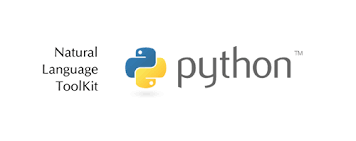

<p style=" font-size:20px; text-align:left"> Data Collection </p>

In order to scrape a web page we fisrt need to download it. This can be done using the Python requests library, which makes a **get** request to a server to download the HTML contents of the web page.

In [43]:
import requests
page = requests.get("https://www.dailymail.co.uk/news/article-10926745/Eurovision-Song-Contest-2023-held-BRITAIN-Ukraine-safety-fears-organisers-say.html")

After running our request we can check the *status_code* property wich is assigned to the Response object. It informs us whether the page has been sucessfully downloaded.

In [44]:
print(page)

<Response [200]>


*Status_code* of 200 indicates that the download has been succesfull.

The HTML content of the page can be printed out using the following code:

In [45]:
#page.content

However, content shown in this way is not easily readable. To fix thtis problem we can use **Beautiful Soup library**.

In [46]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

<p style=" font-size:20px; text-align:left"> Data Analysis </p>

The output of the data can be further improved by identifying the paragraphs. The code below first finds paragraphs, and then deletes paragraphs which contained only white spaces and presents only the textual content from the data.

In [47]:
paragraphs = soup.find_all('p')
only_text = []
for paragraph in paragraphs:
    processed = paragraph.get_text()
    processed = processed.strip()
    if len(processed) > 1:
        only_text.append(processed)
        
print(only_text)

['By Matthew Lodge For Mailonline', 'Published:  11:16 BST, 17 June 2022   |  Updated:  16:56 BST, 17 June 2022', '2.4k', 'View  comments', "Ukraine has insisted it should host next year's Eurovision Song Contest after the organisers announced they would look for it to take place outside the war-torn country over safety fears.", "The eastern European country said it still wants to host the event, something that would normally happen after its entry Kalush Orchestra, won this year's show in Turin in May.", 'However, the European Broadcasting Union (EBU) said this morning that it intends to look elsewhere for a venue after discussions with Ukrainian public broadcaster UA:PBC.', "Traditionally the winner of the international singing contest hosts the next year's edition, but the EBU wants break with tradition, saying that because of the ongoing war in Ukraine it is not safe for it to take place there.", "Instead, the EBU said it will discuss with the BBC whether it will host the event in 

Now the data can be **tokenized** and **tagged** for part of speech.

In [48]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import string

tuples = []
for sentence in only_text:
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        tuples.append(item)
print(tuples)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agnie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\agnie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agnie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('By', 'IN'), ('Matthew', 'NNP'), ('Lodge', 'NNP'), ('For', 'IN'), ('Mailonline', 'NNP'), ('Published', 'VBN'), (':', ':'), ('11:16', 'CD'), ('BST', 'NNP'), (',', ','), ('17', 'CD'), ('June', 'NNP'), ('2022', 'CD'), ('|', 'NNP'), ('Updated', 'VBD'), (':', ':'), ('16:56', 'CD'), ('BST', 'NNP'), (',', ','), ('17', 'CD'), ('June', 'NNP'), ('2022', 'CD'), ('2.4k', 'CD'), ('View', 'NN'), ('comments', 'NNS'), ('Ukraine', 'NNP'), ('has', 'VBZ'), ('insisted', 'VBN'), ('it', 'PRP'), ('should', 'MD'), ('host', 'VB'), ('next', 'JJ'), ('year', 'NN'), ("'s", 'POS'), ('Eurovision', 'NNP'), ('Song', 'NNP'), ('Contest', 'NNP'), ('after', 'IN'), ('the', 'DT'), ('organisers', 'NNS'), ('announced', 'VBD'), ('they', 'PRP'), ('would', 'MD'), ('look', 'VB'), ('for', 'IN'), ('it', 'PRP'), ('to', 'TO'), ('take', 'VB'), ('place', 'NN'), ('outside', 'IN'), ('the', 'DT'), ('war-torn', 'JJ'), ('country', 'NN'), ('over', 'IN'), ('safety', 'NN'), ('fears', 'NNS'), ('.', '.'), ('The', 'DT'), ('eastern', 'JJ'), ('Eu

Another step is removing stop words from the data. Stop words are words which do not influence the meaning, they are function. 
Stop words include:
* articles,
* prepositions,
* pronouns,
* conjunctions.


In [69]:
from nltk.corpus import stopwords
final_words = []
for word in tuples:
    if word not in stopwords.words('english'):
        final_words.append(word)
#print(final_words)

Now a statistical analysis of parts of speech may be conducted with the following code:

In [70]:
counter_dict = {}
for item in final_words:
    if item[1] not in counter_dict:
        counter_dict[item[1]] = 1
    else:
        counter_dict[item[1]] += 1

print(counter_dict)

{'IN': 530, 'NNP': 670, 'VBN': 152, ':': 48, 'CD': 133, ',': 194, 'VBD': 195, 'NN': 551, 'NNS': 153, 'VBZ': 72, 'PRP': 107, 'MD': 62, 'VB': 139, 'JJ': 230, 'POS': 94, 'DT': 433, 'TO': 95, '.': 154, 'RB': 123, 'WDT': 14, 'PRP$': 59, '(': 28, ')': 28, 'CC': 85, 'VBG': 78, "''": 25, 'WP': 8, 'VBP': 34, 'WRB': 15, 'RP': 5, 'EX': 9, 'JJR': 6, 'RBS': 3, '$': 1, 'NNPS': 4, 'PDT': 4, 'JJS': 7, 'RBR': 2, '``': 1, 'FW': 3}


Below is a list of the labels for the different parts of speech:
* DT - Determiner
* NN - Singular noun
* MD - Modal
* RB - Adverb
* VB - Verb, base form
* VBN - Verb, past participle
* CC - Coordinating conjunction
* JJ - Adjective
* NNP - Singular proper noun
* NNS - Plural noun
* VBZ - Verb, 3rd person singular
* IN - Preposition/Subordinating conjunction
* JJS - Adjective, superlative
* CD - Cardinal digit
* VBD - Verb, past tense
* POS - Possessive ending
* PRP - Personal pronoun
* VBG - Verb, gerund/present participle
* WDT - Wh-determiner
* VBP - Verb, singular, present
* RP - Participle
* WP - Wh-pronoun
* PRP$ - Possesive pronoun
* TO - to go 'to' school
* NNPS - Proper noun, plural
* WRB - Who-adverb
* PDT - Predeterminer
* RBS - Adverb, superlative

This data can be visualised with the use of of the **matplotlib** package

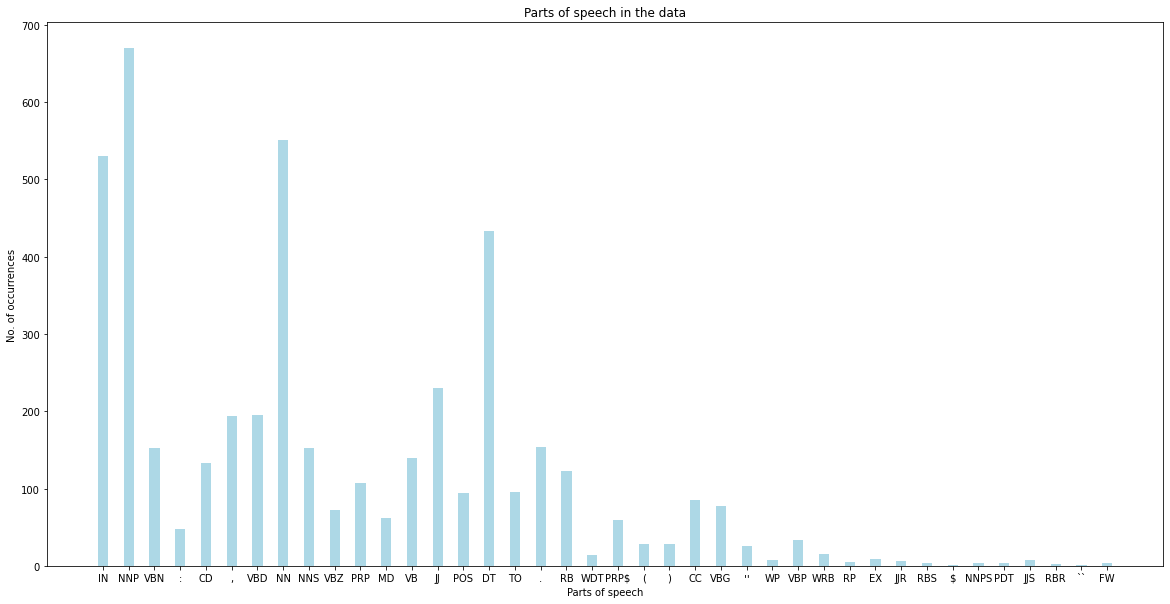

In [77]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
counter_dict = {'IN': 530, 'NNP': 670, 'VBN': 152, ':': 48, 'CD': 133, ',': 194, 'VBD': 195, 'NN': 551, 'NNS': 153, 'VBZ': 72, 'PRP': 107, 'MD': 62, 'VB': 139, 'JJ': 230, 'POS': 94, 'DT': 433, 'TO': 95, '.': 154, 'RB': 123, 'WDT': 14, 'PRP$': 59, '(': 28, ')': 28, 'CC': 85, 'VBG': 78, "''": 25, 'WP': 8, 'VBP': 34, 'WRB': 15, 'RP': 5, 'EX': 9, 'JJR': 6, 'RBS': 3, '$': 1, 'NNPS': 4, 'PDT': 4, 'JJS': 7, 'RBR': 2, '``': 1, 'FW': 3}

dict_keys = list(counter_dict.keys())
dict_values = list(counter_dict.values())

fig = plt.figure(figsize = (20, 10))
 
plt.bar(dict_keys, dict_values, color ='lightblue',
        width = 0.4)
 
plt.xlabel("Parts of speech")
plt.ylabel("No. of occurrences")
plt.title("Parts of speech in the data")
plt.show()

Another process in the data analysis is **lemmatization**, so the grouping together of different forms of the same word. 

In [78]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

lemmatized_words = [[wnl.lemmatize(word) for word in l] for l in final_words]
#print(lemmatized_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\agnie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NLTK module allows us to identify named entities:

In [90]:
entities = nltk.chunk.ne_chunk(final_words)
print(entities)

(S
  By/IN
  (PERSON Matthew/NNP Lodge/NNP)
  For/IN
  (PERSON Mailonline/NNP)
  Published/VBN
  :/:
  11:16/CD
  BST/NNP
  ,/,
  17/CD
  June/NNP
  2022/CD
  |/NNP
  Updated/VBD
  :/:
  16:56/CD
  BST/NNP
  ,/,
  17/CD
  June/NNP
  2022/CD
  2.4k/CD
  View/NN
  comments/NNS
  (PERSON Ukraine/NNP)
  has/VBZ
  insisted/VBN
  it/PRP
  should/MD
  host/VB
  next/JJ
  year/NN
  's/POS
  (ORGANIZATION Eurovision/NNP Song/NNP Contest/NNP)
  after/IN
  the/DT
  organisers/NNS
  announced/VBD
  they/PRP
  would/MD
  look/VB
  for/IN
  it/PRP
  to/TO
  take/VB
  place/NN
  outside/IN
  the/DT
  war-torn/JJ
  country/NN
  over/IN
  safety/NN
  fears/NNS
  ./.
  The/DT
  eastern/JJ
  (GPE European/JJ)
  country/NN
  said/VBD
  it/PRP
  still/RB
  wants/VBZ
  to/TO
  host/VB
  the/DT
  event/NN
  ,/,
  something/NN
  that/WDT
  would/MD
  normally/RB
  happen/VB
  after/IN
  its/PRP$
  entry/NN
  (PERSON Kalush/NNP Orchestra/NNP)
  ,/,
  won/VBD
  this/DT
  year/NN
  's/POS
  show/NN
  in/IN
  (GP

<p style=" font-size:20px; text-align:left"> Conclusion </p>

These are only a few of the options that the **NLTK** module offers in Natural Language Processing. When combined with **Beautiful Soup Library** it proves to be very effective in web sracping.